<a href="https://colab.research.google.com/github/np03cs4a240231-netizen/Ai/blob/main/Worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Ai/diabetes_.csv")

print(data.head())
print(data.info())
print(data.describe())
print("\nMissing values:\n", data.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [4]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    data[col] = data[col].replace(0, data[col].mean())

print("Missing values after handling:\n", data.isnull().sum())

Missing values after handling:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_count = int(len(X) * test_size)
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

In [6]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [7]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    return np.bincount(k_labels).argmax()

def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

In [8]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy (Original Data): {accuracy:.2f}%")

Accuracy (Original Data): 70.43%


In [9]:
def standard_scaler(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_scaled = standard_scaler(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

In [10]:
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
scaled_accuracy = compute_accuracy(y_test_s, pred_scaled)

print(f"Accuracy (Scaled Data): {scaled_accuracy:.2f}%")

Accuracy (Scaled Data): 71.30%


In [11]:
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)
acc_original, acc_scaled = [], []
time_original, time_scaled = [], []

for k in k_values:
    start = time.time()
    pred = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, pred))

    start = time.time()
    pred_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test_s, pred_s))

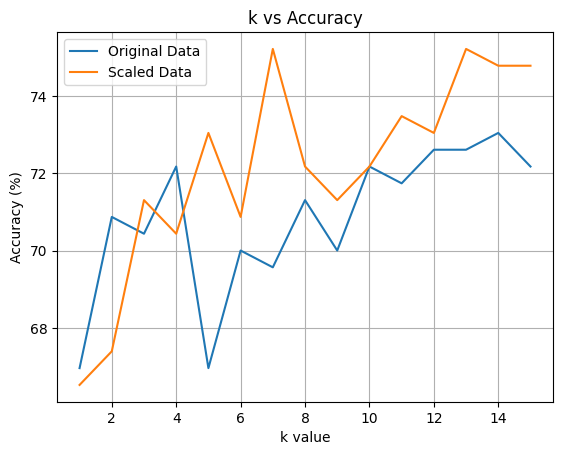

In [12]:
plt.plot(k_values, acc_original, label="Original Data")
plt.plot(k_values, acc_scaled, label="Scaled Data")
plt.xlabel("k value")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()

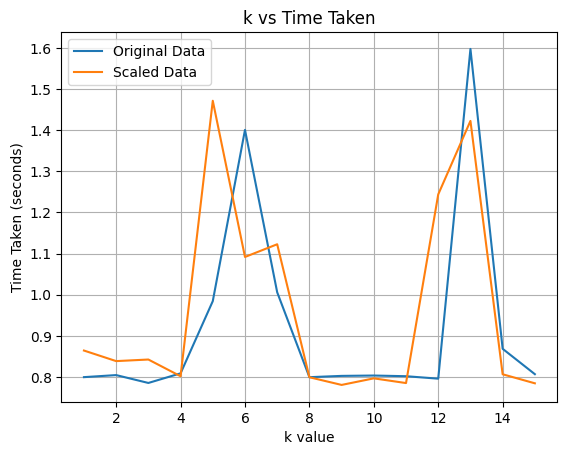

In [13]:
plt.plot(k_values, time_original, label="Original Data")
plt.plot(k_values, time_scaled, label="Scaled Data")
plt.xlabel("k value")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time Taken")
plt.legend()
plt.grid()
plt.show()